In [135]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
def get_time_s(t):
    print(t)
    res = 0
    if t.find('m') != -1: #xxmxxs
        m,s = t.split('m')[:2]
        res += int(m) * 60
        if s == '': 
            return res
        else:
            t = s
    if t[-1] == 's':
        res += float(t[:-1])
    return res 

def get_time_m(t): #get round minutes
    return round(get_time_s(t) / 60)

def get_df_from_data(dataset_name, times, callers):
    caller_names = [n.strip() for n in callers.split(' ')]
    print(caller_names)
    assert len(caller_names) == 4
    ts = times.split(' ')
    ts = [get_time_s(t.strip()) for t in ts]
    assert len(ts) == 4
    Dataset = [dataset_name] * len(ts)
    df = pd.DataFrame([caller_names, Dataset, ts]).T
    df.columns=['Caller', 'Dataset', 'Runtime']    
    return df

# Runtime (old) 

In [ ]:
#------------------FD_2 data run time eva    
#FD_Times = """30m55 34m 218m 490m"""
FD_Times = """31m 34m 218m 490m"""
Mix_Times="""34m 100m 387m 1020m"""
Names="""rabbitvar strelka mutect2 vardict"""
df_fd = get_df_from_data('FD2', FD_Times, Names)
df_mix = get_df_from_data('Mix', Mix_Times, Names)
df = pd.concat([df_fd, df_mix], axis=0)
print(df)
import seaborn as sns
plt.title("Runtime Evaluation", fontsize=18,)
p = sns.barplot(x="Dataset", y="Runtime", hue="Caller", data=df,)
p.set_ylabel("Runtime (s)")
plt.savefig('runtimes.pdf', format='PDF')
# plt.figure(figsize=(9,6))
# plt.bar(caller_names, ts)

In [ ]:
#-------draw depth (tumor Xx, normal Xx)- runtime pic ---------------
rt_str = "15m51.477s 24m31.632s 33m36.350s 41m51.369s 52m41.186s 61m7.076s 66m10.007s 81m35.621s 90m16.916s 100m24.685s"
runtimes = [get_time_s(x) for x in rt_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210, 270, 300, 330]
plt.plot(depth, runtimes)
plt.scatter(depth, runtimes)
plt.xlabel("depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=20,)
plt.show()

In [ ]:
#-------draw depth （tumor Xx, normal 30x）- runtime pic ---------------
rt_str = "15m51.585s 20m0.277s 23m55.003s 28m9.766s 32m4.961s 35m58.762s 39m57.513s 43m29.862s 47m18.722s 52m24.296s 56m12.075s"
strelka_str = "83m13.571s 119m0.733s 140m1.831s 165m3.857s 177m4.349s 161m48.379s 188m35.092s 243m53.303s 232m51.993s 298m26.188s 309m56.644s"
runtimes = [get_time_s(x) for x in rt_str.split(' ')]
runtimes_strelka = [get_time_s(x) for x in strelka_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]

# ## using sns style
# df = pd.DataFrame([depth, runtimes, runtimes_strelka]).T
# df.columns = ['depth', 'RabbitVar', 'Strelka2']
# import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# sns.lineplot(data = df, x = 'depth', y = 'RabbitVar', markers="o",)
# sns.lineplot(data = df, x = 'depth', y = 'Strelka2', markers="o",)

plt.style.use('ggplot')
plt.grid(axis="x") 
plt.xlabel("Depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=18,)

plt.plot(depth, runtimes, label='RabbitVar')
plt.scatter(depth, runtimes)
plt.plot(depth, runtimes_strelka, label = 'Strelka2')
plt.scatter(depth, runtimes_strelka)
plt.legend()

for i in range(len(depth)):
    plt.text(depth[i] - 10, runtimes_strelka[i]+500, f'{runtimes_strelka[i]/runtimes[i]:.1f}x')

plt.savefig('Detpth2Rtime.pdf', format='PDF')
plt.show()

In [ ]:
def add_speedup_text(rt_x, rt_rabv, depth, yplus):
    for i in range(len(depth)):
        plt.text(depth[i] - 10, rt_x[i] + yplus, f'{rt_x[i]/rt_rabv[i]:.1f}x')

#-------draw depth （tumor Xx, normal 30x）- runtime pic-- tmp: vardict&mutect ---------------
rt_str = "15m51.585s 20m0.277s 23m55.003s 28m9.766s 32m4.961s 35m58.762s 39m57.513s 43m29.862s 47m18.722s 52m24.296s 56m12.075s"
strelka_str = "83m13.571s 119m0.733s 140m1.831s 165m3.857s 177m4.349s 161m48.379s 188m35.092s 243m53.303s 232m51.993s 298m26.188s 309m56.644s"
mutect2_str = "103m 178m 276m 381m 497m 639m 751m"
vardict_str = "684m 1056m 1383m 1577m 2015m 2458m 2969m"
runtimes = [get_time_m(x) for x in rt_str.split(' ')][:7]
runtimes_strelka = [get_time_m(x) for x in strelka_str.split(' ')][:7]
runtimes_mutect2 = [get_time_m(x) for x in mutect2_str.split(' ')]
runtimes_vardict = [get_time_m(x) for x in vardict_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210] #, 240, 270, 300, 330]


# ## using sns style
# df = pd.DataFrame([depth, runtimes, runtimes_strelka]).T
# df.columns = ['depth', 'RabbitVar', 'Strelka2']
# import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# sns.lineplot(data = df, x = 'depth', y = 'RabbitVar', markers="o",)
# sns.lineplot(data = df, x = 'depth', y = 'Strelka2', markers="o",)

plt.style.use('ggplot')
plt.grid(axis="x") 
plt.xlabel("Depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=18,)

plt.plot(depth, runtimes, label='RabbitVar')
plt.scatter(depth, runtimes)
plt.plot(depth, runtimes_strelka, label = 'Strelka2')
plt.scatter(depth, runtimes_strelka)
plt.legend()
plt.plot(depth, runtimes_mutect2, label='Mutect2')
plt.scatter(depth, runtimes_mutect2)
plt.plot(depth, runtimes_vardict, label = 'VarDict')
plt.scatter(depth, runtimes_vardict)
plt.legend()

add_speedup_text(runtimes_strelka, runtimes, depth, 10 )
add_speedup_text(runtimes_mutect2, runtimes, depth, 100)
add_speedup_text(runtimes_vardict, runtimes, depth, 10 )
plt.savefig('Detpth2Rtime.pdf', format='PDF')
plt.show()

# Detection result evaluation

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


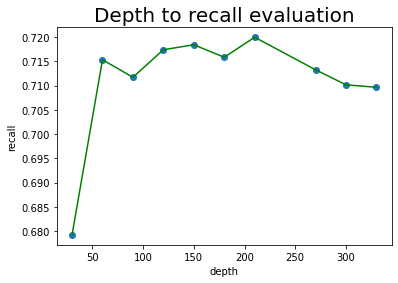

In [23]:
#--------rabbitvar result evaluation------------------#
val_result="""indels          1939            8666            1317            7349            622             0.6792160907684374      0.15197322870990077     0.24837340876944836
indels          1939            8263            1387            6876            552             0.7153171738009283      0.16785671063778287     0.27190746912370123
indels          1939            8107            1380            6727            559             0.7117070654976793      0.17022326384605896     0.274736213418276
indels          1939            7971            1391            6580            548             0.7173800928313564      0.17450759001380003     0.2807265388496468
indels          1939            7936            1393            6543            546             0.7184115523465704      0.17552923387096775     0.28212658227848103
indels          1939            7806            1388            6418            551             0.7158329035585353      0.17781193953369204     0.28486403283735245
indels          1939            7755            1396            6359            543             0.7199587416193914      0.18001289490651193     0.2880132040437384
indels          1939            7566            1383            6183            556             0.7132542547705003      0.18279143536875495     0.2910047343503419
indels          1939            7512            1377            6135            562             0.7101598762248582      0.18330670926517573     0.29139773568934507
indels          1939            7473            1376            6097            563             0.7096441464672512      0.18412953298541415     0.29239269018274544"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

recalls = [float(x) for x in list(data['recall'])]
plt.plot(depth, recalls, color='g')
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel("recall")
plt.title("Depth to recall evaluation", fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


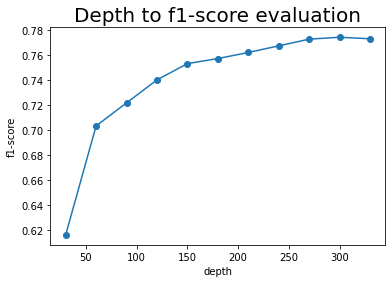

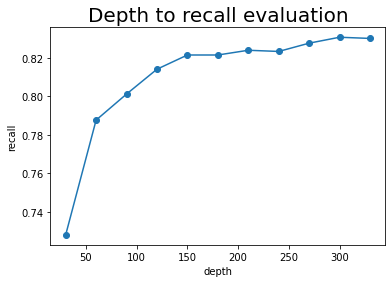

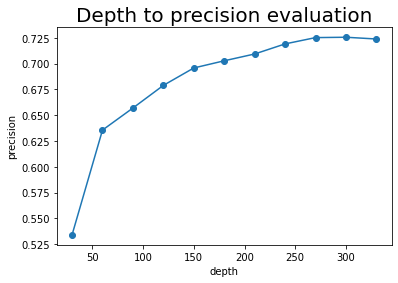

In [8]:
#--------rabbitvar result evaluation: T Xx, N 30x------------------#
val_result="""indels          1625            2215            1183            1032            442             0.728                   0.5340857787810384      0.6161458333333334
indels          1625            2014            1280            734             345             0.7876923076923077      0.6355511420059583      0.7034899697719155
indels          1625            1982            1302            680             323             0.8012307692307692      0.656912209889001       0.7219295813695592
indels          1625            1949            1323            626             302             0.8141538461538461      0.6788096459722934      0.740346950195859
indels          1625            1919            1335            584             290             0.8215384615384616      0.6956748306409588      0.7533860045146726
indels          1625            1900            1335            565             290             0.8215384615384616      0.7026315789473684      0.7574468085106383
indels          1625            1888            1339            549             286             0.824                   0.7092161016949152      0.762311414745232
indels          1625            1861            1338            523             287             0.8233846153846154      0.7189682966147233      0.7676419965576592
indels          1625            1855            1345            510             280             0.8276923076923077      0.7250673854447439      0.7729885057471263
indels          1625            1861            1350            511             275             0.8307692307692308      0.7254164427727029      0.7745266781411361
indels          1625            1864            1349            515             276             0.8301538461538461      0.7237124463519313      0.7732874749211808"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = "f1-score"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "recall"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "precision"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


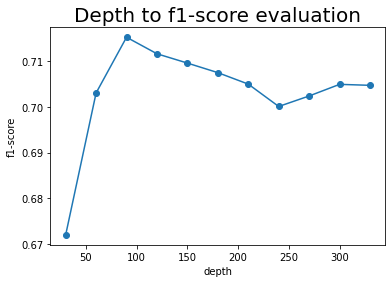

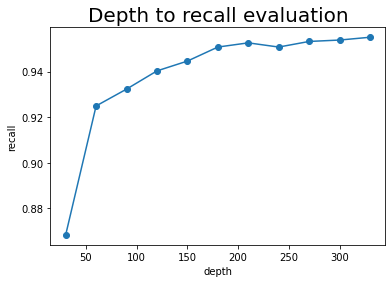

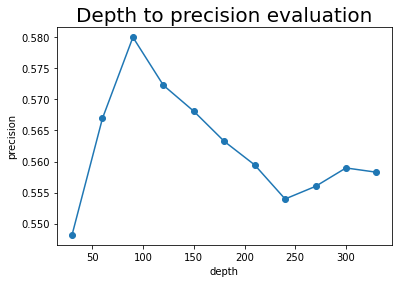

In [11]:
#--------rabbitvar result evaluation: T Xx, N 30x------------------#
#------------ReRun_MoreFeature: xgboost-------------#
val_result="""indels          1625            2574            1411            1163            214             0.8683076923076923         0.5481740481740481      0.6720647773279352
indels          1625            2651            1503            1148            122             0.924923076923077          0.5669558657110524      0.7029934518241348
indels          1625            2612            1515            1097            110             0.9323076923076923         0.5800153139356815      0.7151286287467549
indels          1625            2670            1528            1142            97              0.9403076923076923         0.5722846441947566      0.7115250291036088
indels          1625            2702            1535            1167            90              0.9446153846153846         0.5680977054034049      0.7094984978044834
indels          1625            2743            1545            1198            80              0.9507692307692308         0.5632519139628145      0.7074175824175825
indels          1625            2767            1548            1219            77              0.9526153846153846         0.5594506685941453      0.7049180327868851
indels          1625            2789            1545            1244            80              0.9507692307692308         0.5539619935460739      0.7000453103760762
indels          1625            2786            1549            1237            76              0.9532307692307692         0.5559942569992822      0.7023350714123783
indels          1625            2773            1550            1223            75              0.9538461538461539         0.5589614136314461      0.7048658481127785
indels          1625            2780            1552            1228            73              0.955076923076923          0.5582733812949641      0.7046538024971623"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = "f1-score"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
back_morefeature_xgboost = recalls
tag = "recall"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "precision"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


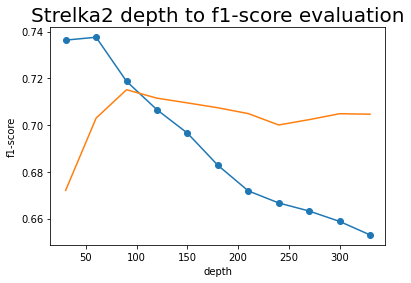

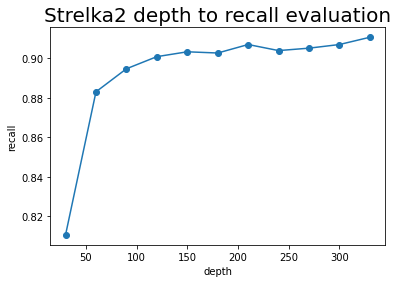

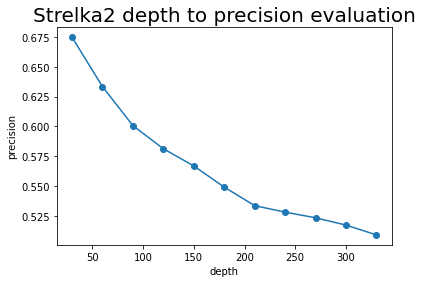

In [12]:
#--------strelka result evaluation: T Xx, N 30x------------------#
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
val_result="""indels          1625            1952            1317            635             308             0.8104615384615385      0.6746926229508197      0.7363712608331003
indels          1625            2266            1435            831             190             0.8830769230769231      0.6332744924977934      0.7375995887946543
indels          1625            2421            1454            967             171             0.8947692307692308      0.600578273440727       0.7187345526445872
indels          1625            2519            1464            1055            161             0.9009230769230769      0.5811830091306074      0.7065637065637066
indels          1625            2590            1468            1122            157             0.9033846153846153      0.5667953667953668      0.6965599051008303
indels          1625            2672            1467            1205            158             0.9027692307692308      0.5490269461077845      0.6828019548522226
indels          1625            2763            1474            1289            151             0.9070769230769231      0.5334781035106768      0.6718322698268003
indels          1625            2782            1469            1313            156             0.904                   0.5280373831775701      0.6666666666666667
indels          1625            2811            1471            1340            154             0.9052307692307693      0.5233013162575596      0.663210099188458
indels          1625            2850            1474            1376            151             0.9070769230769231      0.5171929824561403      0.6587709497206704
indels          1625            2908            1480            1428            145             0.9107692307692308      0.5089408528198074      0.6529891903816456"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = 'f1-score'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
#---------compare different f1-score----------#
plt.plot(depth, back_morefeature_xgboost)
plt.show()

tag = 'recall'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

tag = 'precision'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
plt.show()



# Some global setting

In [193]:
g_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] #matplotlib default colors
g_callers = ['RabbitVar', 'Strelka2', 'Mutect2', 'VarDict']
g_color_map = {}
for ca, co in zip(g_callers, g_colors):
  g_color_map[ca.lower()] = co
  g_color_map[ca] = co


# AF bin count picture

In [4]:
def get_bed_sorted(bed):
  regions = dict()
  with open(bed, 'r') as f:
    for line in f:
      chr, start, end = line.split('\t')[:3]
      if str(chr) in regions:
        regions[str(chr)].append([int(start), int(end)])
      else:
        regions[str(chr)] = list()
        regions[str(chr)].append([int(start), int(end)])
  for k, v in regions.items():
    regions[k] = sorted(v)
  return regions

def is_in_highconf(chr, start, regions):
  if chr not in regions:
    return False
  regs = regions[chr]
  start = int(start)
  for rstart, rend in regs:
    if start + 50 < rstart:
      break
    if start > rstart and start < rend:
      #print('in region:', start, rstart, rend)
      return True
  return False


In [5]:
highconf_regions = get_bed_sorted("/Users/zhanghao/workspace/VariantCalling/ResVisual/High-Confidence_Regions_v1.2.bed")

In [11]:
##########---------------------------AF bin count picture---------------------------##
import numpy as np
import re
import os

def get_variants(fname, vtype):
    vars = dict() #{site : var_items}
    filters = set()
    with open(fname, 'r') as f:
        for var in f:
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            if filter.find('PASS') == -1: continue
            if vtype == 'INDEL' and (len(ref) == 1 and len(alt) == 1): continue #only indels
            if vtype == 'SNV' and (len(ref) > 1 or len(alt) > 1): continue #only snvs
            #if not is_in_highconf(chrom, pos, highconf_regions): continue
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref.upper() + ":" + alt_i.upper()
                vars[site] = items
    print(f"vars size: {len(vars)}")
    return vars

def get_variants_zip(fname, vtype):
    import gzip 
    vars = dict() #{site : var_items}
    filters = set()
    with gzip.open(fname, 'rb') as f:
        for var in f:
            var = var.decode('utf-8')
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            if filter.find('PASS') == -1: continue
            if vtype == 'INDEL' and (len(ref) == 1 and len(alt) == 1): continue #only indels
            if vtype == 'SNV' and (len(ref) > 1 or len(alt) > 1): continue #only snvs
            #if not is_in_highconf(chrom, pos, highconf_regions): continue
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref.upper() + ":" + alt_i.upper()
                vars[site] = items
    print(f"vars size: {len(vars)}")
    return vars

def get_af_bin(vars, s, e, by, af_express):
    res = dict()
    s = int(s * 100)
    e = int(e * 100)
    by = int(by * 100)
    by_f = by / 100
    for i in range(s, e + by, by):
        i = i / 100
        key = str(round(i, 2)) + '-' + str(round(i + by_f, 2))
        #print("----",key)
        res[key] = []
    by = by_f
    for var_site, var_items in vars.items():
        try:
          af = eval(af_express)
          if af > 1.0: continue
          #print(var_site, af)
        except:
          print('eval wrong!', af_express, var_items)
          continue
        #print(af_express, var_items)
        bs, be = round((int(af / by)) * by, 2), round(int(af / by + 1) * by, 2)
        key = str(bs) + '-' + str(be)
        #print("key: ", key)
        res[key].append(var_site)
    return res

def get_variants_from_remote(fpath, vtype, zipped):
  """
  Get data the variant calling format data from remote host
  """
  if zipped:
    stat = os.system(f"scp {fpath} /Users/zhanghao/workspace/VariantCalling/ResVisual/tmp.vcf.gz")
  else:
    stat = os.system(f"scp {fpath} /Users/zhanghao/workspace/VariantCalling/ResVisual/tmp.vcf")

  if stat != 0: 
    print("scp wrong!!")
    return #scp wrong
  if zipped: 
    res = get_variants_zip("/Users/zhanghao/workspace/VariantCalling/ResVisual/tmp.vcf.gz", vtype)
  else:
    res = get_variants("/Users/zhanghao/workspace/VariantCalling/ResVisual/tmp.vcf", vtype)
  return res

def get_val_res_by_afbin(called_vars, called_vars_bin, truth_vars_bin):
  """
  @desc: Calculate the recall/prec/f1-s from bined result and bined truth
  @param: called_vars - calling result of the caller
  @param: called_vars_bin - bined calling result of the caller
  @param: thruth_vars_bin - bined calling result of truth
  """
  bins_to_res = dict() #recal, precision, f1-score
  for bin_k, bin_truth_vars in truth_vars_bin.items():
    count = 0
    bin_af_vars = called_vars_bin[bin_k]
    for v in bin_truth_vars:
      #if v in bin_af_vars:
      if v in called_vars:
        count += 1
    t_total = len(bin_truth_vars)
    t_recall = count / len(bin_truth_vars) if len(bin_truth_vars) != 0 else 0
    t_prec = count / len(bin_af_vars) if len(bin_af_vars) != 0 else 0
    t_f1score = t_recall * t_prec * 2 / \
        (t_recall + t_prec) if (t_recall != 0 or t_prec != 0) else 0
    bins_to_res[bin_k] = [t_total, t_recall, t_prec, t_f1score]
  return bins_to_res

def bins2res_result_visual(caller_vars, caller_vars_bin, truth_vars_bin, save_pdf=""):

  bins_to_res = get_val_res_by_afbin(caller_vars, caller_vars_bin, truth_vars_bin)

  import pandas as pd
  import seaborn as sns
  from matplotlib import pyplot as plt
  data = []
  for k, v in bins_to_res.items():
      data.append([k, *v])
  df = pd.DataFrame(data)
  df.columns = ['af', 'total', 'rec', 'prec', 'f1-s']
  print(df)
  # calc total recall
  tmp_tt = list(df['total'])
  tmp_rec = list(df['rec'])
  total_var_detected = 0
  total_var = 0
  for t, r in zip(tmp_tt, tmp_rec):
    total_var_detected += t * r
    total_var += t
  print(f"total recall: {total_var_detected / total_var}")
  plt.xticks(rotation=270)
  sns.barplot(x="VAF", y="Recall", data=df)
  if save_pdf != "":
    plt.savefig(save_pdf, type='PDF')


In [2]:
import pandas as pd
from numpy import *
import re
from io import StringIO
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

def get_time_s(t):
    #print(t)
    res = 0
    if t.find('m') != -1: #xxmxxs
        m,s = t.split('m')[:2]
        res += int(m) * 60
        if s == '': 
            return res
        else:
            t = s
    if t[-1] == 's':
        res += float(t[:-1])
    return res

def get_time_m(t):
  return get_time_s(t) / 60

def pd_read_from_org_tbname(fname, tbname):
  buf = ""
  with open(fname, 'r') as f:
    start_parse = False
    for line in f:
      if line.strip() == "#+name: {}".format(tbname): start_parse = True
      if start_parse and line.strip() == "": 
        print("stop")
        start_parse = False
        break # if meet empty line, stop parsing
      if (not start_parse) or (line[0] != "|"): continue;
      if not re.match("^\|-[-\+]+\|$", line):  # skip spilt line |-----+-----+----|
        buf += line

  D = pd.read_csv(StringIO(buf), sep='|')
  D = D.drop(D.columns[0], axis=1)
  D = D.drop(D.columns[-1], axis=1)
  D = D.rename(columns=lambda x: x.strip())
  return D

def pd_read_from_org(fname):
  buf = ""
  with open(fname, 'r') as f:
    for line in f:
      if line[0] != "|": continue;
      if not re.match("^\|-[-\+]+\|$", line):  # skip spilt line |-----+-----+----|
        buf += line

  D = pd.read_csv(StringIO(buf), sep='|')
  D = D.drop(D.columns[0], axis=1)
  D = D.drop(D.columns[-1], axis=1)
  D = D.rename(columns=lambda x: x.strip())
  return D

# AF bin distribution of different caller

In [28]:
## get truth data
truth_file = 'plt:/home/data/data_share/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf'
truth_file_local = "/Users/zhanghao/workspace/VariantCalling/ResVisual/hcctruth.vcf"
if not os.path.exists(truth_file_local):
  stat =  os.system(f"scp {truth_file} {truth_file_local}")
  print(stat)
truth_indels = get_variants(truth_file_local, "INDEL") 
truth_af_express = 'float(re.search(r\';TVAF=(0\\.\\w+);\', var_items[7]).group(1))'
truth_af_bin = get_af_bin(truth_indels, 0, 1, 0.1, truth_af_express)

vars size: 1602


chrom chrY not found in highconf region
chrom chrY not found in highconf region
chrom chrY not found in highconf region
chrom chrY not found in highconf region
chrom chrY not found in highconf region
chrom chr1_KI270706v1_random not found in highconf region
chrom chr1_KI270712v1_random not found in highconf region
chrom chr4_GL000008v2_random not found in highconf region
chrom chr9_KI270719v1_random not found in highconf region
chrom chr14_KI270723v1_random not found in highconf region
chrom chr14_KI270724v1_random not found in highconf region
chrom chr14_KI270725v1_random not found in highconf region
chrom chr16_KI270728v1_random not found in highconf region
chrom chr16_KI270728v1_random not found in highconf region
chrom chr17_KI270729v1_random not found in highconf region
chrom chr22_KI270731v1_random not found in highconf region
chrom chr22_KI270736v1_random not found in highconf region
chrom chr22_KI270737v1_random not found in highconf region
chrom chr22_KI270738v1_random not fou

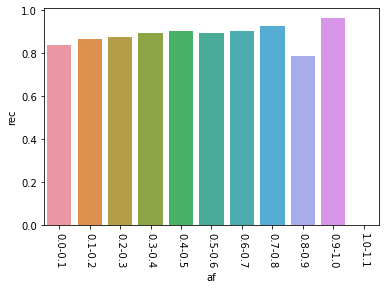

In [29]:
## get mutect2 data
mutect_indels = get_variants_from_remote("amd1:/home/large/haoz/BCBIO_WGS/workspace/WGS_NV_T_1/HCC1395_WGS_NV_T_1/WGS_NV_T_1/WGS_NV_T_1-mutect2.vcf.gz",
                                         "INDEL", zipped = True)
af_express = 'float(var_items[-1].split(\':\')[2])'
variant_af_bin = get_af_bin(mutect_indels, 0, 1, 0.1, af_express)
bins2res_result_visual(mutect_indels, variant_af_bin, truth_af_bin)

vars size: 1822
         af  total       rec      prec      f1-s
0   0.0-0.1    383  0.900783  1.029851  0.961003
1   0.1-0.2    416  0.925481  1.410256  1.117562
2   0.2-0.3    291  0.951890  0.800578  0.869702
3   0.3-0.4    185  0.951351  0.671756  0.787472
4   0.4-0.5    137  0.941606  0.558442  0.701087
5   0.5-0.6     65  0.892308  0.306878  0.456693
6   0.6-0.7     42  0.928571  0.406250  0.565217
7   0.7-0.8     28  0.678571  0.826087  0.745098
8   0.8-0.9     28  0.928571  2.000000  1.268293
9   0.9-1.0     27  1.000000  0.658537  0.794118
10  1.0-1.1      0  0.000000  0.000000  0.000000
total recall: 0.9244694132334582


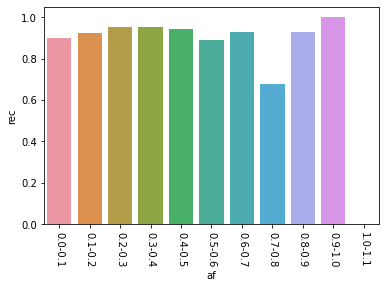

In [33]:
## get rabbitvar data
tmp_plt_nv_t1_path = 'plt:/home/user_home/haoz/workspace/RabbitVar/RandomForest/validate/indel.vcf'
#rabvar_indels = get_variants_from_remote('plt:/home/large/haoz/HCC1395_DATAS/WGS/rabbitvar_results/T100_N100/WGS_NV_T_1.txt.indel.vcf',
#                                          "INDEL", zipped = False)    
rabvar_indels = get_variants_from_remote( tmp_plt_nv_t1_path,
                                          "INDEL", zipped = False)    
#rabvar_vars = get_variants(res_file)
af_express = 'float(var_items[7].split(\';\')[5][3:])'
variant_af_bin = get_af_bin(rabvar_indels, 0, 1, 0.1, af_express)

bins2res_result_visual(rabvar_indels, variant_af_bin, truth_af_bin)

In [35]:
# get strelka data
sk2_indels = get_variants_from_remote("amd1:/home/large/haoz/BCBIO_WGS/workspace/WGS_NV_T_1/HCC1395_WGS_NV_T_1/WGS_NV_T_1/WGS_NV_T_1-strelka2.vcf.gz",
                                         "INDEL", zipped = True)

vars size: 1658


         af  total       rec      prec      f1-s
0   0.0-0.1    383  0.699739  2.161290  1.057199
1   0.1-0.2    416  0.901442  1.182965  1.023192
2   0.2-0.3    291  0.945017  0.781250  0.855365
3   0.3-0.4    185  0.940541  0.674419  0.785553
4   0.4-0.5    137  0.970803  0.538462  0.692708
5   0.5-0.6     65  0.953846  0.311558  0.469697
6   0.6-0.7     42  1.000000  0.763636  0.865979
7   0.7-0.8     28  0.964286  0.771429  0.857143
8   0.8-0.9     28  0.964286  0.729730  0.830769
9   0.9-1.0     27  0.703704  0.633333  0.666667
10  1.0-1.1      0  0.000000  0.000000  0.000000
total recall: 0.8751560549313359


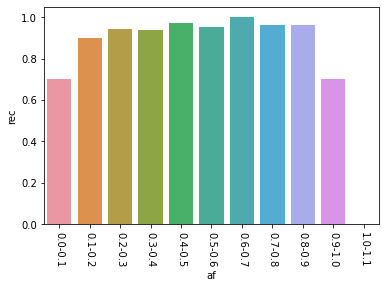

In [36]:
af_express = 'float(var_items[-1].split(\':\')[-1].strip())'
variant_af_bin = get_af_bin(sk2_indels, 0, 1, 0.1, af_express)

bins2res_result_visual(sk2_indels, variant_af_bin, truth_af_bin)

In [37]:
vd_indels = get_variants_from_remote("amd1:/home/large/haoz/BCBIO_WGS/workspace/WGS_NV_T_1/HCC1395_WGS_NV_T_1/WGS_NV_T_1/WGS_NV_T_1-vardict.vcf.gz",
                                         "INDEL", zipped = True)

vars size: 30210


         af  total       rec      prec      f1-s
0   0.0-0.1    383  0.939948  0.022049  0.043088
1   0.1-0.2    416  0.954327  0.060713  0.114162
2   0.2-0.3    291  0.958763  0.111155  0.199215
3   0.3-0.4    185  0.913514  0.117117  0.207617
4   0.4-0.5    137  0.948905  0.125604  0.221843
5   0.5-0.6     65  0.923077  0.071599  0.132890
6   0.6-0.7     42  0.952381  0.073529  0.136519
7   0.7-0.8     28  1.000000  0.099291  0.180645
8   0.8-0.9     28  1.000000  0.139303  0.244541
9   0.9-1.0     27  1.000000  0.103053  0.186851
10  1.0-1.1      0  0.000000  0.000000  0.000000
total recall: 0.947565543071161


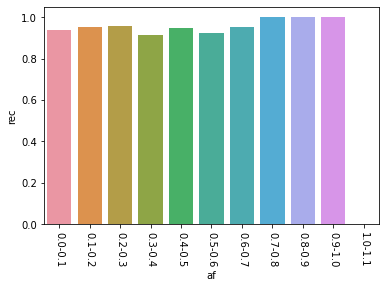

In [38]:
af_express = 'float(var_items[-2].split(\':\')[6])'
variant_af_bin = get_af_bin(vd_indels, 0, 1, 0.1, af_express)

bins2res_result_visual(vd_indels, variant_af_bin, truth_af_bin)

In [75]:
truth_file = '/home/data/haoz/data/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf.gz'
truth_indels = get_variants_zip(truth_file) 

# Variant Allel Frequency / other fearture after Filter

In [25]:
vtype = 'INDEL'
indel_file = 'plt:/home/large/haoz/HCC1395_DATAS/SPP/rabbitvar_result/diff_dpeth/som_res_0918/SPP_PURE_80x.indel.vcf'
rabvar_vars = get_variants_from_remote(indel_file, vtype, False)
## get truth data
truth_file = 'plt:/home/data/data_share/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf'
truth_file_local = "/Users/zhanghao/workspace/VariantCalling/ResVisual/hcctruth.indel.vcf"
if not os.path.exists(truth_file_local):
  stat =  os.system(f"scp {truth_file} {truth_file_local}")
  print(stat)
truth_indels = get_variants(truth_file_local, vtype) 

vars size: 240438
vars size: 2069


In [26]:
# generate data
import pandas as pd
data = []
for var_site, var_items in rabvar_vars.items():
    af = float(var_items[7].split(';')[5][3:])
    if var_site in truth_indels:
        label = 1
    else:
        label = 0
    data.append([var_site, af, label])
res_data = pd.DataFrame(data, columns = ['site', 'af', 'label'])
print(sum(res_data['label'] == 1))
#     bs, be = round((int(af / by)) * by, 2), round(int(af / by + 1) * by, 2)
#     key = str(bs) + '-' + str(be)
#     #print("key: ", key)
#     res[key].append(var_site)

1566


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


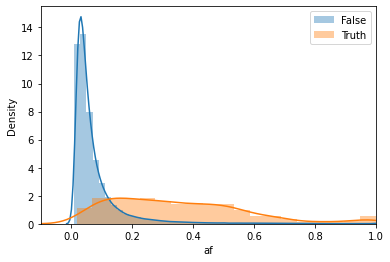

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
def preprocess(data):
    pass
def plt_one_data(data, feature):
  plt.xlim(-0.10, 1) 
  sns.distplot(data[data['label'] == 0][feature], label = 'False')
  sns.distplot(data[data['label'] == 1][feature], label = "Truth")
  plt.legend()
res_data = res_data[res_data['af'] > 0]
plt_one_data(res_data, 'af')
plt.savefig('Distrubution_TF_with_AF.indel.pdf', format = 'PDF')

In [12]:
vtype = "SNV"
snv_file = 'plt:/home/large/haoz/HCC1395_DATAS/SPP/rabbitvar_result/diff_dpeth/som_res_0918/SPP_PURE_80x.indel.vcf'
rabvar_vars = get_variants_from_remote(snv_file, vtype, False)


vars size: 617029


In [ ]:
## get truth data
truth_file = 'plt:/home/data/data_share/FD/Truth/sSNV.MSDUKT.superSet.v1.2.vcf'
truth_file_local = "/Users/zhanghao/workspace/VariantCalling/ResVisual/hcctruth.snv.vcf"
if not os.path.exists(truth_file_local):
  stat =  os.system(f"scp {truth_file} {truth_file_local}")
  print(stat)
truth_indels = get_variants(truth_file_local, "SNV") 

In [22]:
# generate data
import pandas as pd
data = []
for var_site, var_items in rabvar_vars.items():
    af = float(var_items[7].split(';')[5][3:])
    if var_site in truth_indels:
        label = 1
    else:
        label = 0
    data.append([var_site, af, label])
res_data = pd.DataFrame(data, columns = ['site', 'af', 'label'])

                      site        af  label
56         chr1:877772:G:C  1.000000      1
106       chr1:1004726:G:A  0.523810      1
115       chr1:1049980:G:C  1.000000      1
159       chr1:1212740:A:C  1.000000      1
165       chr1:1263518:G:A  0.763636      1
...                    ...       ...    ...
616958  chr9:138072041:G:C  0.231707      1
616974  chr9:138120682:G:A  0.195122      1
616975  chr9:138124837:C:T  0.407767      1
616988  chr9:138161738:G:A  0.245098      1
616991  chr9:138171255:G:C  0.159236      1

[38000 rows x 3 columns]


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


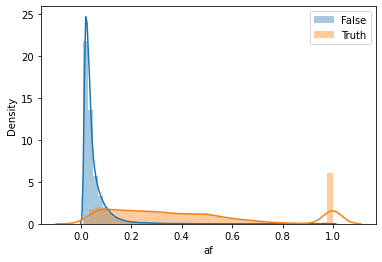

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
def preprocess(data):
    pass
def plt_one_data(data, feature):
    print(data[data['label'] == 1])
    sns.distplot(data[data['label'] == 0][feature], label = 'False')
    sns.distplot(data[data['label'] == 1][feature], label = "Truth")
    plt.legend()
plt_one_data(res_data, 'af')
plt.savefig('Distrubution_TF_with_AF.pdf', format = 'PDF')

# eight sample of HCC1395 sample and calling result

### Bar plot

stop


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

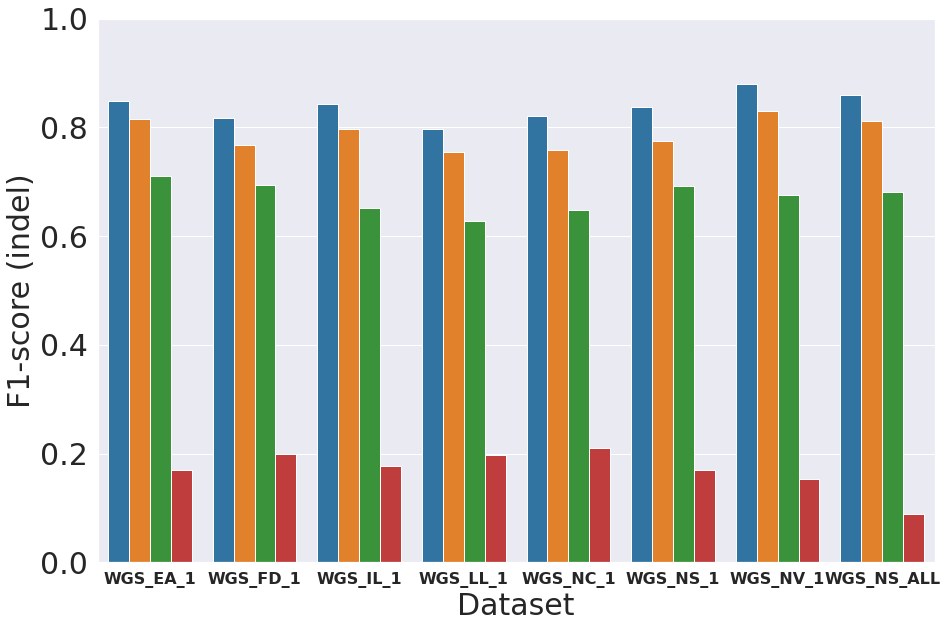

In [195]:
filename = "wgs_diff_sample.org"
#colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
#sns.palplot(sns.color_palette(colors))
sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'indel')
data['caller & data'] = data['caller & data'].str.strip()
data['caller'] = data.apply(lambda x: x['caller & data'].split('_')[-1], axis = 1)
data['Sample'] =  data.apply(lambda x: '_'.join(x['caller & data'].split('_')[:-1]), axis = 1)
plt.figure(figsize=(15, 10))
gfg = sns.barplot(x = 'Sample', y = 'f1-score', hue = 'caller',  
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], data = data, palette= colors)
gfg.set_ylim(0.0, 1.0)
#plt.legend(ncol = 4, fontsize=24)
plt.legend([],[], frameon=False)
plt.xlabel("Dataset" ,fontsize = 30)
plt.ylabel("F1-score (indel)", fontsize = 30)
plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 30)
#plt.savefig('WGS_DIFF_SAMPLE_INDEL.pdf', format='PDF')

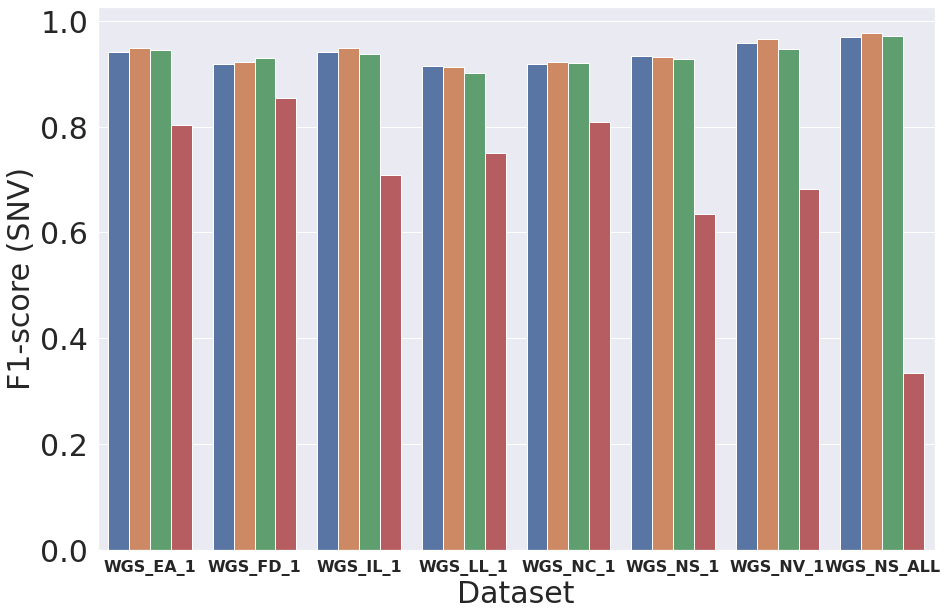

In [135]:
filename = "wgs_diff_sample.org"
data = pd_read_from_org_tbname(filename, 'snv')
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
data['caller & data'] = data['caller & data'].str.strip()
data['caller'] = data.apply(lambda x: x['caller & data'].split('_')[-1], axis = 1)
data['Sample'] =  data.apply(lambda x: '_'.join(x['caller & data'].split('_')[:-1]), axis = 1)
plt.figure(figsize=(15, 10))
gfg = sns.barplot(x = 'Sample', y = 'f1-score', hue = 'caller',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], data = data, )
                  #palette= colors)
plt.legend([],[], frameon=False)
#gfg.set_ylim(0.0, 1.1)
#plt.legend(ncol = 4)
plt.xlabel("Dataset" ,fontsize = 30)
plt.ylabel("F1-score (SNV)", fontsize = 30)
plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 30)
plt.savefig('WGS_DIFF_SAMPLE_SNV.pdf', format='PDF')


### Scatter plot

stop
rabbitvar


<Figure size 1080x720 with 0 Axes>

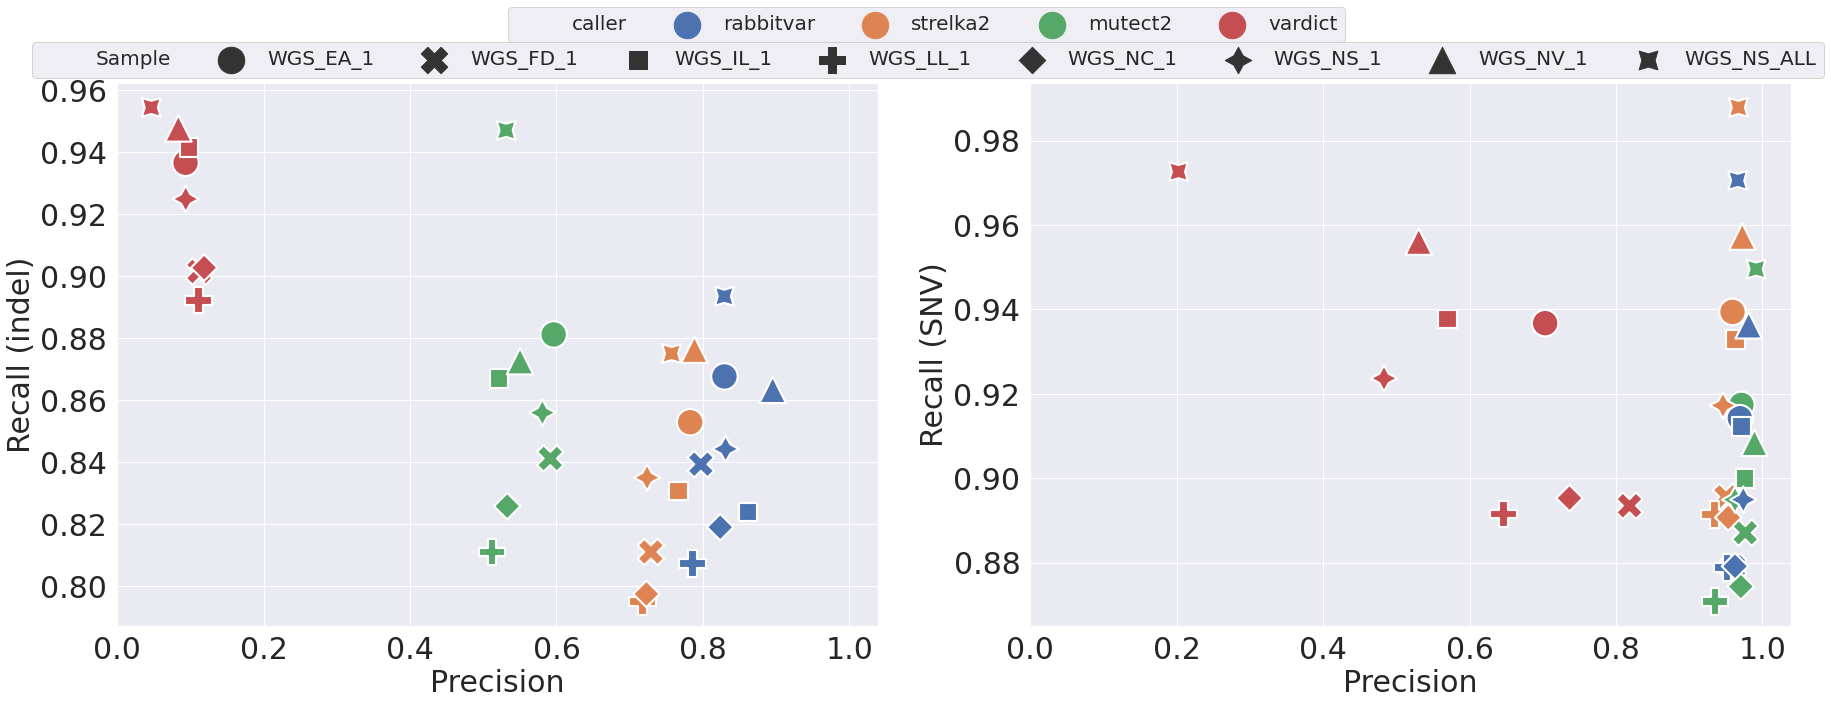

In [175]:
filename = "wgs_diff_sample.org"
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
#sns.palplot(sns.color_palette(colors))
sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'indel')
data['caller & data'] = data['caller & data'].str.strip()
data['caller'] = data.apply(lambda x: x['caller & data'].split('_')[-1], axis = 1)
data['Sample'] =  data.apply(lambda x: '_'.join(x['caller & data'].split('_')[:-1]), axis = 1)
data['type'] = ['indel'] * len(data)

data2 = pd_read_from_org_tbname(filename, 'snv')
data2['caller & data'] = data2['caller & data'].str.strip()
data2['caller'] = data2.apply(lambda x: x['caller & data'].split('_')[-1], axis = 1)
data2['Sample'] =  data2.apply(lambda x: '_'.join(x['caller & data'].split('_')[:-1]), axis = 1)
data2['type'] = ['SNV'] * len(data)
#data = pd.concat([data, data2])

plt.figure(figsize=(15, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10), sharex=True)

gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',  marker = 'o',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'Sample',
                  data = data, s = 700, ax = ax1)
                      #palette= colors, s = 700, ax=ax1)
gfg.legend_.remove()
ax1.yaxis.set_tick_params(labelsize=30, labelright=False)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.set_ylabel('Recall (indel)', fontsize = 30)
ax1.set_xlabel('Precision', fontsize = 30)

gfg2 = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'Sample',
                  data = data2, s = 700, ax = ax2)
                       #palette= colors, s = 700, ax=ax2)
gfg2.legend_.remove()
ax2.yaxis.set_tick_params(labelsize=30, labelright=False)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.set_ylabel('Recall (SNV)', fontsize = 30)
ax2.set_xlabel('Precision', fontsize = 30)


handles, labels = gfg.get_legend_handles_labels()
for h in handles:
  h.set_sizes([700]) #set_markersize(10)
#handles, lables,
print(labels[1])
#fig.legend(handles[5:], labels[5:], fontsize=20, bbox_to_anchor=(0.999, 0.89), loc = 'center right', ncol=len(labels[5:]))
fig.legend(handles[5:], labels[5:], fontsize=20, bbox_to_anchor = (0.92, 0.95) , loc = 'upper right', ncol=len(labels[5:]))
fig.legend(handles[:5], labels[:5], fontsize=20, bbox_to_anchor = (0.5, 0.999), loc = 'upper center', ncol=len(labels[:5]))

#plt.show()
plt.savefig('WGS_DIFF_SAMPLE_SCATTER.pdf', format='PDF')

# Purity accuracy


stop
['caller', 'rabbitvar', 'strelka2', 'mutect2', 'vardict', 'Purity', 'T100N80', 'T75N80', 'T100N100', 'T75N100']


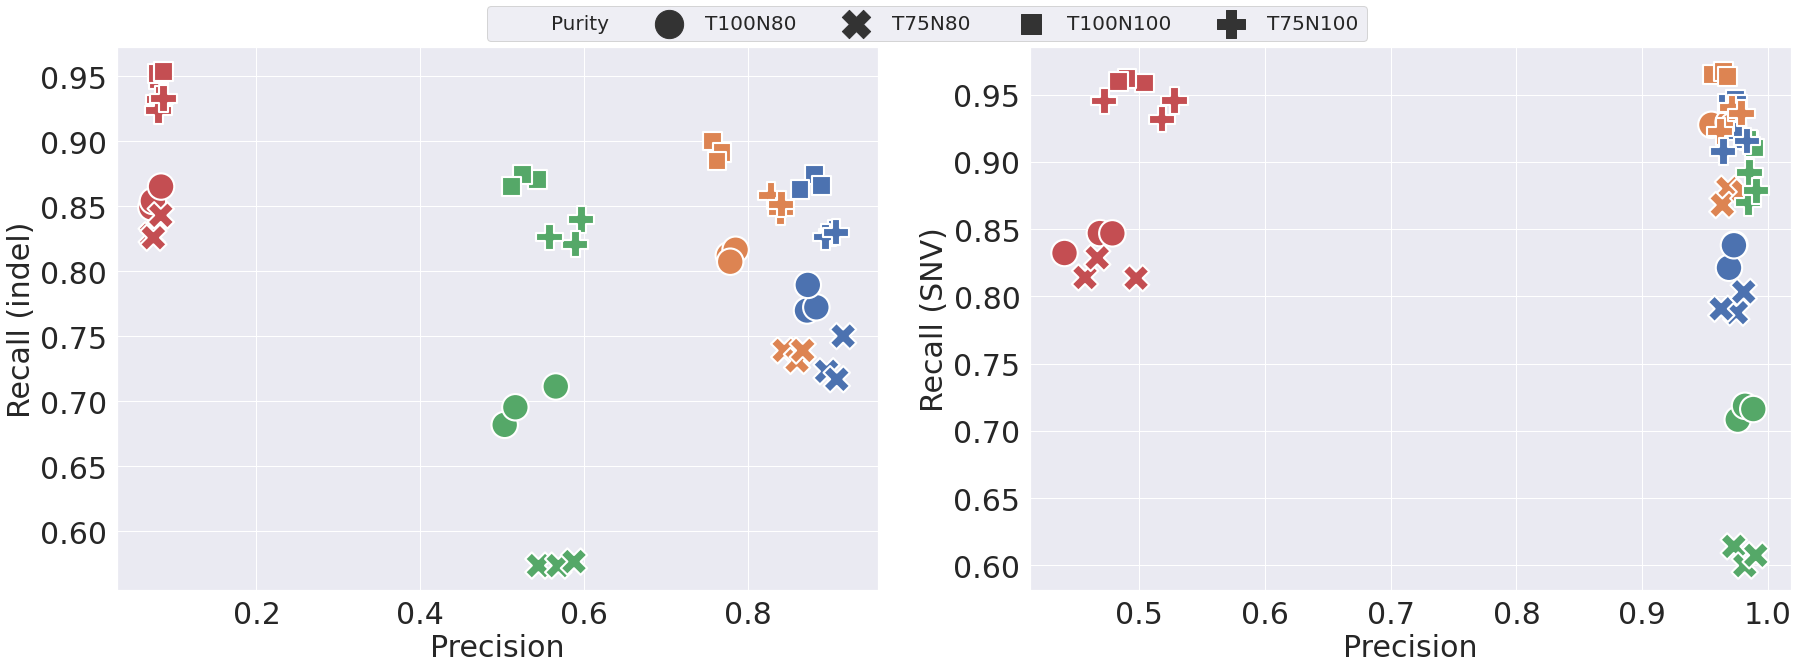

In [174]:
filename = "wgs_diff_purity.org"
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
#sns.palplot(sns.color_palette(colors))
#sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'indel')
data['sample'] = data['sample'].str.strip()
data['caller'] = data['caller'].str.strip()
data['type'] = ['indel'] * len(data)
data['Purity'] = data.apply(lambda x: x['sample'].split('_')[0], axis = 1)

data2 = pd_read_from_org_tbname(filename, 'snv')
data2['sample'] = data2['sample'].str.strip()
data2['caller'] = data2['caller'].str.strip()
data2['type'] = ['indel'] * len(data2)
data2['Purity'] = data2.apply(lambda x: x['sample'].split('_')[0], axis = 1)
# print(data)
#data = pd.concat([data, data2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10),)


gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',  marker = 'o',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'Purity',
                  data = data, s = 700, ax=ax1)
gfg.legend_.remove()
ax1.yaxis.set_tick_params(labelsize=30, labelright=False)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.set_ylabel('Recall (indel)', fontsize = 30)
ax1.set_xlabel('Precision', fontsize = 30)

gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'Purity',
                  data = data2, s = 700, ax=ax2)
gfg.legend_.remove()
ax2.yaxis.set_tick_params(labelsize=30, labelright=False)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.set_ylabel('Recall (SNV)', fontsize = 30)
ax2.set_xlabel('Precision', fontsize = 30)

handles, labels = gfg.get_legend_handles_labels()
for h in handles:
  h.set_sizes([800]) #set_markersize(10)
#handles, lables,
print(labels)
fig.legend(handles[5:], labels[5:], fontsize=20, bbox_to_anchor = (0.5, 0.95), loc = 'upper center', ncol=len(labels[5:]))
# plt.show()
plt.savefig('WGS_DIFF_PURITY_SCATTER.pdf', format='PDF')

stop


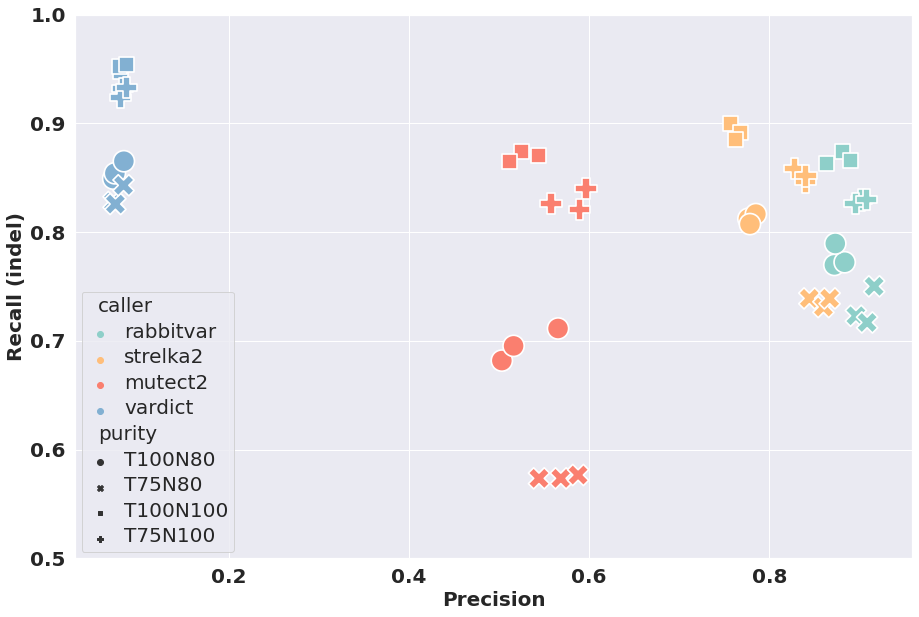

In [296]:
filename = "wgs_diff_purity.org"
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
#sns.palplot(sns.color_palette(colors))
sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'indel')
data['sample'] = data['sample'].str.strip()
data['caller'] = data['caller'].str.strip()
data['type'] = ['indel'] * len(data)
data['purity'] = data.apply(lambda x: x['sample'].split('_')[0], axis = 1)
plt.figure(figsize=(15, 10))

# gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',  marker = 'o',
#                   hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
#                       style = 'Sample',
#                   data = data, palette= colors, s = 200)
#gfg.legend()

# data2 = pd_read_from_org_tbname(filename, 'snv')
# data2['caller'] = data2['caller'].str.strip()
# data2['sample'] =  data2['caller'].str.strip()
# data2['type'] = ['SNV'] * len(data)
# data = pd.concat([data, data2])

gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'purity',
                  data = data, palette= colors, s = 450)

#gfg.legend(fontsize=40, prop={'weight': 'bold'})
plt.setp(gfg.get_legend().get_texts(), fontsize='20')
#plt.legend([],[], frameon=False)
#gfg.set_ylim(0.0, 1.1)

gfg.set_ylim(0.5, 1.0)
# plt.legend(ncol=5)
plt.xlabel("Precision", weight='bold' ,fontsize = 20)
plt.ylabel("Recall (indel)", weight = 'bold', fontsize = 20)
plt.xticks(fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 20, weight = 'bold')
#plt.show()
plt.savefig('WGS_DIFF_PURITY_INDEL_SCATTER.pdf', format='PDF')

stop


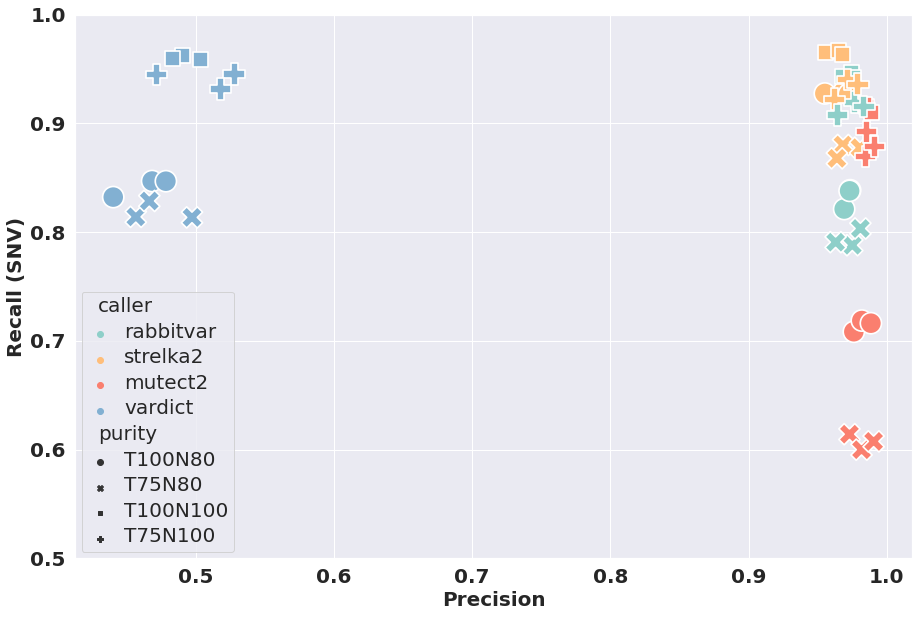

In [297]:
filename = "wgs_diff_purity.org"
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
#sns.palplot(sns.color_palette(colors))
sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'snv')
data['sample'] = data['sample'].str.strip()
data['caller'] = data['caller'].str.strip()
data['type'] = ['indel'] * len(data)
data['purity'] = data.apply(lambda x: x['sample'].split('_')[0], axis = 1)
plt.figure(figsize=(15, 10))
# gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',  marker = 'o',
#                   hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
#                       style = 'Sample',
#                   data = data, palette= colors, s = 200)
#gfg.legend()

# data2 = pd_read_from_org_tbname(filename, 'snv')
# data2['caller'] = data2['caller'].str.strip()
# data2['sample'] =  data2['caller'].str.strip()
# data2['type'] = ['SNV'] * len(data)
# data = pd.concat([data, data2])

gfg = sns.scatterplot(x = 'precision', y = 'recall', hue = 'caller',
                  hue_order = ['rabbitvar', 'strelka2', 'mutect2', 'vardict'], 
                  style = 'purity',
                  data = data, palette= colors, s = 450)

#gfg.legend(fontsize=40, prop={'weight': 'bold'})
plt.setp(gfg.get_legend().get_texts(), fontsize='20')
#plt.legend([],[], frameon=False)
#gfg.set_ylim(0.0, 1.1)

gfg.set_ylim(0.5, 1.0)
# plt.legend(ncol=5)
plt.xlabel("Precision", weight='bold' ,fontsize = 20)
plt.ylabel("Recall (SNV)", weight = 'bold', fontsize = 20)
plt.xticks(fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 20, weight = 'bold')
plt.savefig('WGS_DIFF_PURITY_SNV_SCATTER.pdf', format='PDF')

# Accuracy Different Depth 

stop
['RabbitVar', 'Strelka2', 'Mutect2', 'Vardict', 'RabbitVar', 'Strelka2', 'Mutect2', 'Vardict']


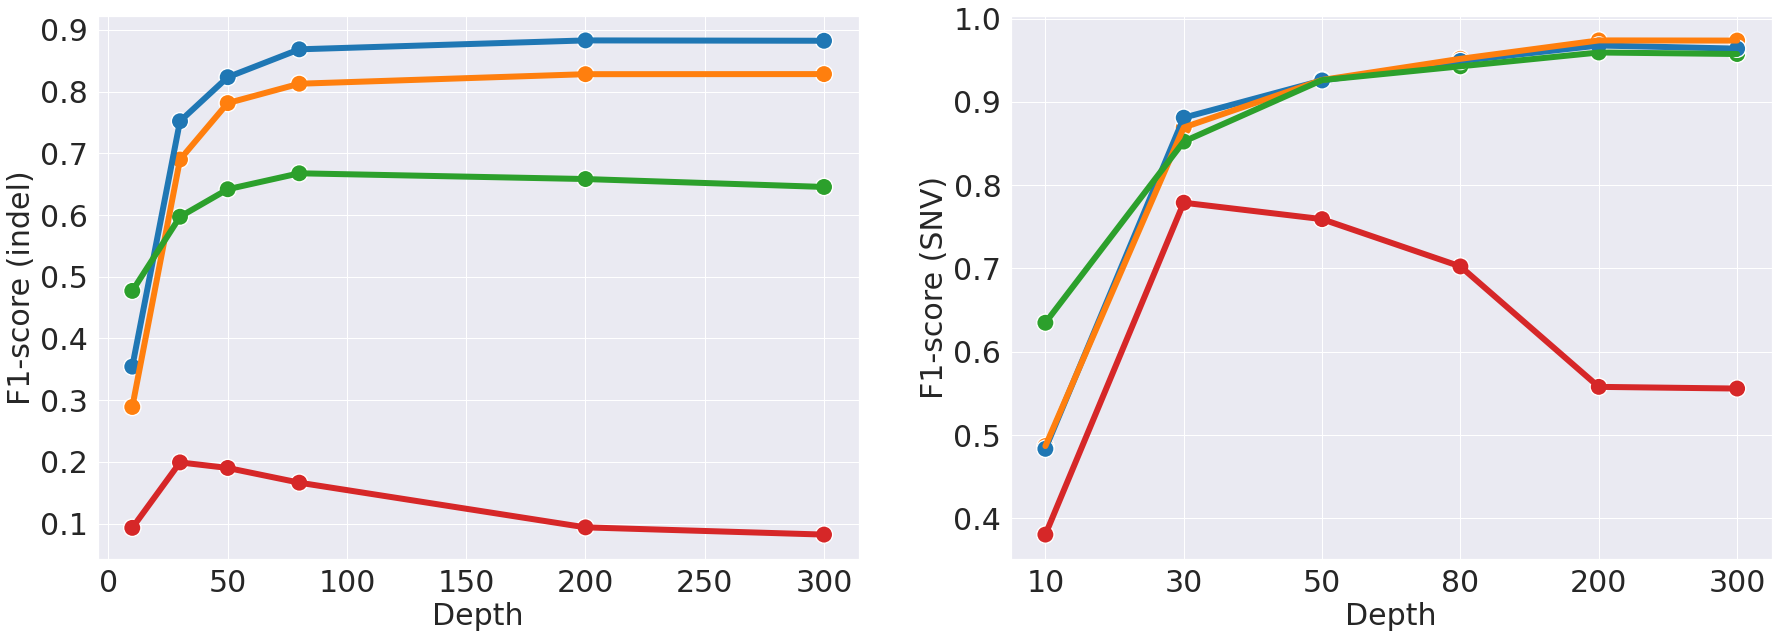

In [219]:
filename = "wgs_diff_depth.org"
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] ## default color array
#sns.palplot(sns.color_palette(colors))
#sns.set(font_scale = 1.2)
data = pd_read_from_org_tbname(filename, 'indel')
data['sample'] = data['sample'].str.strip()
data['depth'] = data.apply(lambda x: int(x['sample'].split('.')[0][:-1]), axis = 1)
data['caller'] = data['caller'].str.strip()
data['type'] = ['indel'] * len(data)
# print(data)

data2 = pd_read_from_org_tbname(filename, 'snv')
data2['sample'] = data2['sample'].str.strip()
data2['depth'] = data2.apply(lambda x: x['sample'].split('.')[0][:-1], axis = 1)
data2['caller'] = data2['caller'].str.strip()
data2['type'] = ['indel'] * len(data2)
# print(data2)
#data = pd.concat([data, data2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10),)


gfg = sns.lineplot(x = 'depth', y = 'f1-score', hue = 'caller',
                  hue_order = ['RabbitVar', 'Strelka2', 'Mutect2', 'Vardict'], 
                  data = data, ax=ax1, linewidth = 6, palette=colors)
gsg = sns.scatterplot(x = 'depth', y = 'f1-score', hue = 'caller', marker = 'o',
                  hue_order = ['RabbitVar', 'Strelka2', 'Mutect2', 'Vardict'], 
                  data = data, ax=ax1,  palette=colors,s = 300)
gfg.legend_.remove()
ax1.yaxis.set_tick_params(labelsize=30, labelright=False)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.set_ylabel('F1-score (indel)', fontsize = 30)
ax1.set_xlabel('Depth', fontsize = 30)

gfg = sns.lineplot(x = 'depth', y = 'f1-score', hue = 'caller',
                  hue_order = ['RabbitVar', 'Strelka2', 'Mutect2', 'Vardict'], 
                  data = data2, ax=ax2, linewidth = 6, palette=colors)
gsg = sns.scatterplot(x = 'depth', y = 'f1-score', hue = 'caller', marker = 'o',
                  hue_order = ['RabbitVar', 'Strelka2', 'Mutect2', 'Vardict'], 
                  data = data2, ax=ax2,  palette=colors,s = 300)
gfg.legend_.remove()
ax2.yaxis.set_tick_params(labelsize=30, labelright=False)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.set_ylabel('F1-score (SNV)', fontsize = 30)
ax2.set_xlabel('Depth', fontsize = 30)

handles, labels = gfg.get_legend_handles_labels()
for h in handles:
  h.set_linewidth(10) #set_markersize(10)

print(labels)
#fig.legend(handles, labels, fontsize=20, loc = 'upper center', ncol=len(labels))
#plt.show()
plt.savefig('WGS_DIFF_DEPTH_LINE_F1.pdf', format='PDF')

# Runtime with different depth

Index(['Depth', 'strelka', 'mutect', 'vardict', 'rabbitvar'], dtype='object')
             Depth  rabbitvar  strelka  mutect  vardict
0   SPP_PURE_10x         10.0     11.0    45.0     52.0
1   SPP_PURE_30x         13.0     52.0    57.0    158.0
2   SPP_PURE_50x         16.0     81.0    76.0    259.0
3   SPP_PURE_80x         21.0    111.0   110.0    362.0
4   SPP_PURE_200x        43.0    155.0   306.0    781.0
5   SPP_PURE_300x        61.0    248.0   512.0   1051.0


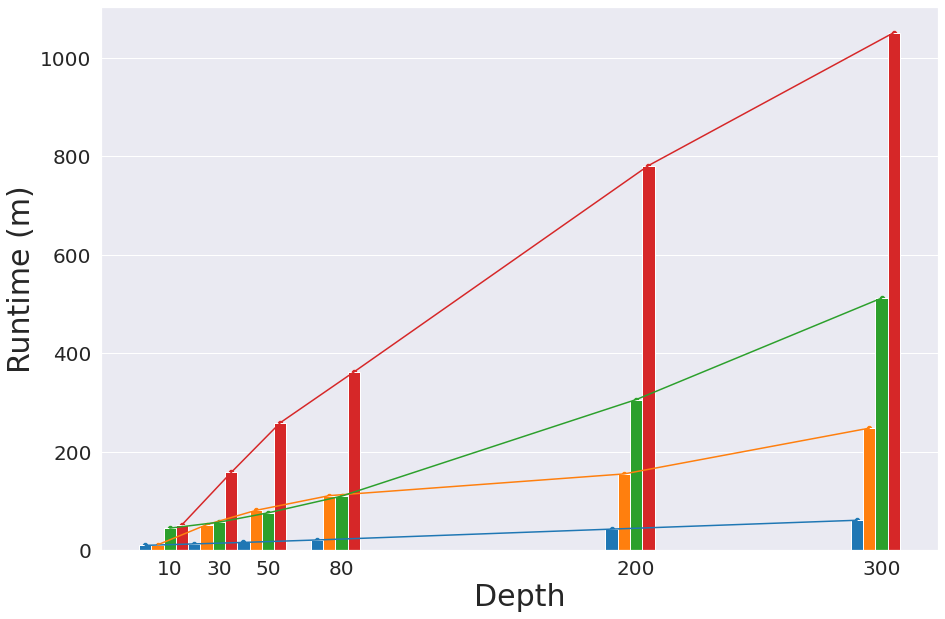

In [199]:
filename = "runtime_depth.org"
data = pd_read_from_org(filename)
print(data.columns)
for c in ['strelka', 'mutect', 'vardict', 'rabbitvar']:
  data[c] = data[c].map(get_time_m)
data = data[['Depth', 'rabbitvar', 'strelka', 'mutect', 'vardict']]
print(data)

# filename = "./runtime_depth_hiconfreg.org"
# data_hr = pd_read_from_org(filename)
# for c in ['strelka', 'mutect', 'vardict', 'rabbitvar']:
#   data_hr[c] = data_hr[c].map(get_time_m)
# data_hr = data_hr[['Depth', 'rabbitvar', 'strelka', 'mutect', 'vardict']]
# print(data_hr)

#data['caller'] = data.apply(lambda x: x['caller & data'].split('_')[-1], axis = 1)
#data['data'] =  data.apply(lambda x: '_'.join(x['caller & data'].split('_')[:-1]), axis = 1)
#print(data)
plt.figure(figsize=(15, 10))
#plt.style.use('ggplot')
plt.grid(axis="x")

x_ticks = [10, 30, 50, 80, 200, 300]
plt.xticks(x_ticks)
colors = ['blue', 'orange', 'green', 'red']
# https://blog.csdn.net/LuohenYJ/article/details/118268302
colors = ['#00ff7f', '#007fff', '#ff007f', '#ff7f00']
#https://blog.csdn.net/slandarer/article/details/114157177
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] ## default color array

i = -10
for caller in data.columns[1:]:
  #plt.title("Depth to runtime evaluation", fontsize=18,)
  cc = colors[(i+10) // 5]
  x_bar = [10+i, 30+i, 50+i, 80+i, 200+i, 300+i]
  #x_bar = x_ticks
  bfg = plt.bar(x = x_bar, height = data[caller], label = caller, width = 5, color = cc)
  gfg = sns.lineplot(x = x_bar, y = data[caller], color = cc)
  cfg = sns.scatterplot(x = x_bar, y = data[caller], color = cc)
  i += 5

plt.xlabel("Depth" ,fontsize = 30)
plt.ylabel("Runtime (m)", fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# i = -10
# for caller in data_hr.columns[1:]:
#   cc = colors[(i+10) // 5]
#   x_bar = [10+i, 30+i, 50+i, 80+i, 200+i, 300+i]
#   x_bar = x_ticks
#   #bfg = plt.bar(x = x_bar, height = data[caller], label = caller, width = 5, color = cc)
#   gfg = sns.lineplot(x = x_bar, y = data_hr[caller], linestyle='--', color = cc)
#   cfg = sns.scatterplot(x = x_bar, y = data_hr[caller], markers='.', color = cc)
#   i += 5  
#data[data.columns[1:]].plot(kind = 'bar')
#data[data.columns[1:]].plot(kind = 'line', secondary_y=True)
#plt.legend(prop={'size': 16})
plt.legend([],[], frameon=False)
plt.savefig("runtime_depth_noreg.pdf", format='PDF')

Index(['Depth', 'strelka', 'mutect', 'vardict', 'rabbitvar'], dtype='object')
Index(['Depth', 'strelka', 'mutect', 'vardict', 'rabbitvar'], dtype='object')


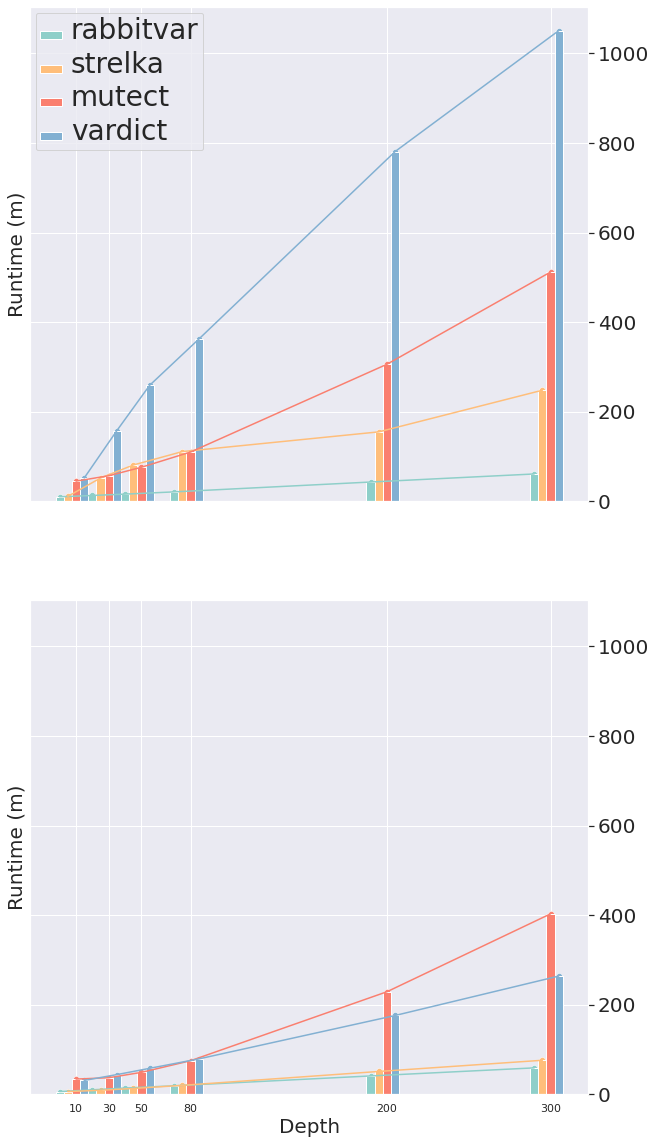

In [201]:
filename = "runtime_depth.org"
def get_df_data(filename):
  data = pd_read_from_org(filename)
  print(data.columns)
  for c in ['strelka', 'mutect', 'vardict', 'rabbitvar']:
    data[c] = data[c].map(get_time_m)
  data = data[['Depth', 'rabbitvar', 'strelka', 'mutect', 'vardict']]
  return data

data = get_df_data(filename)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20), sharex=True, sharey = True)
#plt.style.use('ggplot')
#sns.set(style = 'darkgrid')

x_ticks = [10, 30, 50, 80, 200, 300]
plt.xticks(x_ticks)
colors = ['green', 'black', 'blue', 'red']
# https://blog.csdn.net/LuohenYJ/article/details/118268302
colors = ['#00ff7f', '#007fff', '#ff007f', '#ff7f00']
#https://blog.csdn.net/slandarer/article/details/114157177
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']

ax2.set_xlabel('Depth', fontsize = 20)
#ax1.set_xlabel('Depth')
ax1.set_ylabel('Runtime (m)', fontsize = 20)
ax2.set_ylabel('Runtime (m)', fontsize = 20)
ax1.yaxis.set_tick_params(labelsize=20, labelright=True)
#ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelsize=20, labelright=True)
ax2.yaxis.tick_right()

i = -10
for caller in data.columns[1:]:
  #plt.title("Depth to runtime evaluation", fontsize=18,)
  cc = colors[(i+10) // 5]
  x_bar = [10+i, 30+i, 50+i, 80+i, 200+i, 300+i]
  #x_bar = x_ticks
  bfg = ax1.bar(x = x_bar, height = data[caller], label=caller, width = 5, color = cc)
  gfg = sns.lineplot(x = x_bar, y = data[caller], color = cc, ax = ax1)
  cfg = sns.scatterplot(x = x_bar, y = data[caller], color = cc, ax = ax1)
  i += 5
plt.setp(gfg.get_legend().get_texts(), fontsize=28) 

  
i = -10
filename = "./runtime_depth_hiconfreg.org"
data = get_df_data(filename)
for caller in data.columns[1:]:
  #plt.title("Depth to runtime evaluation", fontsize=18,)
  cc = colors[(i+10) // 5]
  x_bar = [10+i, 30+i, 50+i, 80+i, 200+i, 300+i]
  #x_bar = x_ticks
  bfg = ax2.bar(x = x_bar, height = data[caller], width = 5, color = cc)
  gfg = sns.lineplot(x = x_bar, y = data[caller], color = cc, ax = ax2)
  cfg = sns.scatterplot(x = x_bar, y = data[caller], color = cc, ax = ax2)
  i += 5
# for legend text

plt.savefig("runtime_depth_combine.pdf", format='PDF') 

In [177]:
ax1.set_xlabel?

In [ ]:
filename = "runtime_depth.org"


def read_df_format_for_sns(filename):
  data = pd_read_from_org(filename)
  print(data.columns)
  for c in ['strelka', 'mutect', 'vardict', 'rabbitvar']:
    data[c] = data[c].map(get_time_m)
  data = data[['Depth', 'rabbitvar', 'strelka', 'mutect', 'vardict']]
  #print(data)
  #change to 【caller ， depth， runtime】 format
  t_caller  = []
  t_depth   = []
  t_runtime = []
  depth = [10, 30, 50, 80, 200, 300]
  depth_len = len(depth)
  for c in ['strelka', 'mutect', 'vardict', 'rabbitvar']:
    t_caller.extend([c]*depth_len)
    t_depth.extend(depth)
    t_runtime.extend(data[c])

  data = pd.DataFrame()
  data['caller'] = t_caller
  data['depth']  = t_depth
  data['runtime']= t_runtime
  #print(data)
  return data

data = read_df_format_for_sns(filename)  

#plt.figure()
fig, ax1 = plt.subplots(figsize=(15, 10))

plt.style.use('ggplot')
plt.grid(axis="x")
plt.xlabel("Depth")
plt.ylabel("Runtime (m)")
x_ticks = [10, 30, 50, 80, 200, 300]
#plt.xticks(x_ticks)
colors = ['green', 'black', 'blue', 'red']
# https://blog.csdn.net/LuohenYJ/article/details/118268302
colors = ['#00ff7f', '#007fff', '#ff007f', '#ff7f00']
#https://blog.csdn.net/slandarer/article/details/114157177
colors = ['#8ecfc9', '#ffbe7a', '#fa7f6f', '#82b0d2']

bfg =     sns.barplot(data = data, x = 'depth', y = 'runtime', hue = 'caller', ax = ax1)
#bfg.tick_params(axis = 'y')
ax2 = ax1.twinx()
lfg =    sns.lineplot(data = data, x = 'depth', y = 'runtime', hue = 'caller' , ax=ax2)
#lfg.tick_params(axis = 'y')
# sfg = sns.scatterplot(data = data, x = 'depth', y = 'runtime', hue = 'caller')
plt.show()
#data[data.columns[1:]].plot(kind = 'bar')
#data[data.columns[1:]].plot(kind = 'line', secondary_y=True)
#plt.legend(prop={'size': 16})
#plt.savefig("runtime_depth_noreg.pdf", format='PDF')

# Allell Frequency difference between caller and truth

In [36]:
##########---------------------------AF bin count picture---------------------------##
import numpy as np
import re
import os

def get_variants(fname, vtype):
    vars = dict() #{site : var_items}
    filters = set()
    with open(fname, 'r') as f:
        for var in f:
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            if filter.find('PASS') == -1: continue
            if vtype == 'INDEL' and (len(ref) == 1 and len(alt) == 1): continue #only indels
            if vtype == 'SNV' and (len(ref) > 1 or len(alt) > 1): continue #only snvs
            #if not is_in_highconf(chrom, pos, highconf_regions): continue
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref.upper() + ":" + alt_i.upper()
                vars[site] = items
    print(f"vars size: {len(vars)}")
    return vars

def get_variants_zip(fname, vtype):
    import gzip 
    vars = dict() #{site : var_items}
    filters = set()
    with gzip.open(fname, 'rb') as f:
        for var in f:
            var = var.decode('utf-8')
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            if filter.find('PASS') == -1: continue
            if vtype == 'INDEL' and (len(ref) == 1 and len(alt) == 1): continue #only indels
            if vtype == 'SNV' and (len(ref) > 1 or len(alt) > 1): continue #only snvs
            #if not is_in_highconf(chrom, pos, highconf_regions): continue
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref.upper() + ":" + alt_i.upper()
                vars[site] = items
    print(f"vars size: {len(vars)}")
    return vars

def get_af_comp_abs(truth_site_af, vars_called, af_express_called):
    res = list()
    for var_site, af_t in truth_site_af.items():
      #af_c = -1
      if af_t > 1.0: continue    
      if var_site in vars_called:
        var_items = vars_called[var_site]
        try:
          af_c = eval(af_express_called)
          #if af_c > 1.0: continue
        except:
          print('eval wrong!', af_express_called, vars_items)
          continue
        res.append(abs(af_t - af_c))
    return res

def get_variants_from_remote(fpath, vtype, zipped):
  """
  Get data the variant calling format data from remote host
  """
  if zipped:
    stat = os.system(f"scp {fpath} /dev/shm/tmp.vcf.gz")
  else:
    stat = os.system(f"scp {fpath} /dev/shm/tmp.vcf")

  if stat != 0: 
    print("scp wrong!!")
    return #scp 
  if zipped: 
    res = get_variants_zip("/dev/shm/tmp.vcf.gz", vtype)
  else:
    res = get_variants("/dev/shm/tmp.vcf", vtype)
  return res


In [11]:
## get truth data
vtype = 'INDEL'
truth_file = '/home/data/data_share/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf'
truth_indels = get_variants(truth_file, "INDEL") 
truth_af_express = 'float(re.search(r\';TVAF=(0\\.\\w+);\', var_items[7]).group(1))'
truth_site_af_map = dict()
for var_site, var_items in truth_indels.items():
  try:
    af_t = eval(truth_af_express)
  except:
    print('eval wrong!', var_site, var_items)
    break
  truth_site_af_map[var_site] = af_t

print(len(truth_site_af_map))

vars size: 2069
2069


In [49]:
## get mutect2 data
mutect_indels = get_variants_from_remote("a1:/home/large/haoz/BCBIO_SPP_DEPTH_WITH_REGION/workspace/SPP_PURE_80x/HCC1395_SPP_PURE_80x/SPP_GT_1-0_1/SPP_GT_1-0_1-mutect2.vcf.gz",
                                         vtype, zipped = True)
af_express = 'float(var_items[-1].split(\':\')[2])'
mut_truth_abs = get_af_comp_abs(truth_site_af_map, mutect_indels, af_express)
print("recall:", len(mut_truth_abs))
print("mutect average af abs:", sum(mut_truth_abs) / len(mut_truth_abs))


vars size: 2636
recall: 1370
mutect average af abs: 0.1187357664233576


In [50]:
## get rabbitvar data 
tmp_plt_nv_t1_path = '/home/large/haoz/HCC1395_DATAS/SPP/rabbitvar_result/diff_dpeth/som_res_1003_withrfv/SPP_PURE_80x.indel.vcf'

rabvar_indels = get_variants( tmp_plt_nv_t1_path, vtype)    
#rabvar_vars = get_variants(res_file)
af_express = 'float(var_items[7].split(\';\')[5][3:])'
rabvar_truth_abs = get_af_comp_abs(truth_site_af_map, rabvar_indels, af_express)
print("recall:", len(rabvar_truth_abs))
print("rabbitvar average af abs: ", sum(rabvar_truth_abs) / len(rabvar_truth_abs))

vars size: 1601
recall: 1401
rabbitvar average af abs:  0.11669559029264823


In [51]:
sk2_indels = get_variants_from_remote("a1:/home/large/haoz/BCBIO_SPP_DEPTH_WITH_REGION/workspace/SPP_PURE_80x/HCC1395_SPP_PURE_80x/SPP_GT_1-0_1/SPP_GT_1-0_1-strelka2.vcf.gz",
                                         vtype, zipped = True)
af_express = 'float(var_items[-1].split(\':\')[-1].strip())'
sk2_truth_abs = get_af_comp_abs(truth_site_af_map, sk2_indels, af_express)
print("recall:", len(sk2_truth_abs))
print("sk2 average af abs: ", sum(sk2_truth_abs) / len(sk2_truth_abs))

vars size: 1755
recall: 1419
sk2 average af abs:  0.10242898773784347


In [52]:
vd_indels = get_variants_from_remote("a1:/home/large/haoz/BCBIO_SPP_DEPTH_WITH_REGION/workspace/SPP_PURE_80x/HCC1395_SPP_PURE_80x/SPP_GT_1-0_1/SPP_GT_1-0_1-vardict.vcf.gz",
                                         vtype, zipped = True)
af_express = 'float(var_items[-2].split(\':\')[6])'
vd_truth_abs = get_af_comp_abs(truth_site_af_map, vd_indels, af_express)
print("recall:", len(vd_truth_abs))
print("vardict average af abs: ", sum(vd_truth_abs) / len(vd_truth_abs))

vars size: 25868
recall: 1505
vardict average af abs:  0.11258823920265768
